# Chladni Modes and Laplacian Spectrum

In [1]:
%matplotlib inline
#
from lrgsglib.core import *
#
move_to_rootf()
plt.style.use('ipynb/nb_plotsheet.mplstyle')
#
path_chladni = PATHDATA / 'chladni'
path_cluster_chladni = PATHDATA / 'cluster_data' / 'chladni'
path_plotchladni = PATHPLOT / 'chladni'

Current working directory: /home/opisthofulax/Documents/PhD/projects/complex-networks/lrgsglib


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32)
y = mnist.target.astype(np.int64)

[53479]


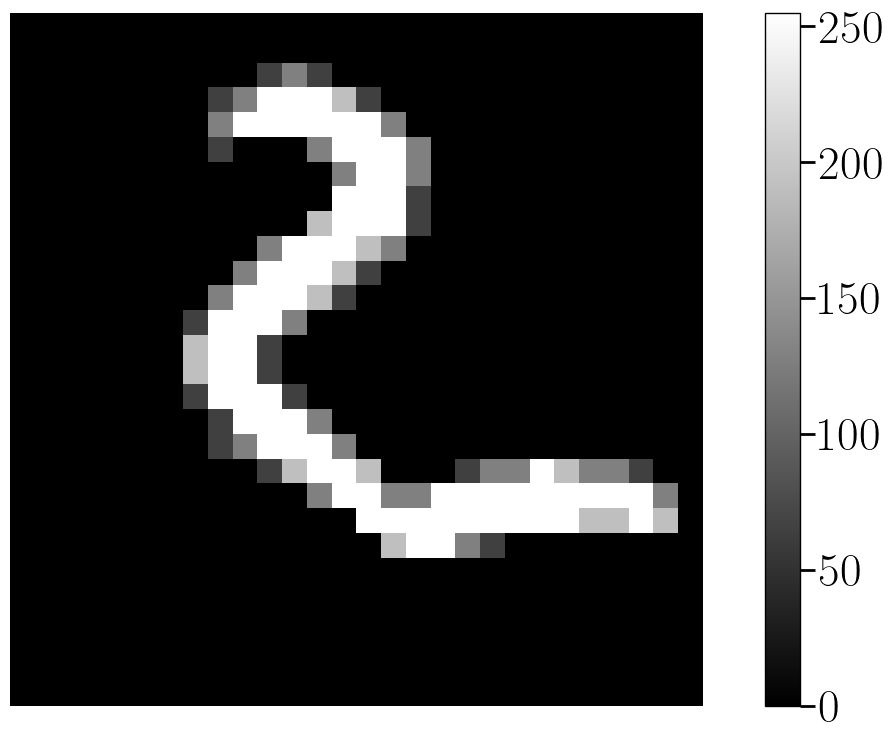

In [34]:
# indices = np.where(y == 8)[0]
indices = np.random.randint(0, len(X), 1)
print(indices)
X_digit = X.iloc[indices][:1] # Use .iloc to index rows correctly
patterns = X_digit.values  # Convert row to numpy array
# patterns = np.where(patterns > 127, 1, -1)
plt.imshow(patterns.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.colorbar()

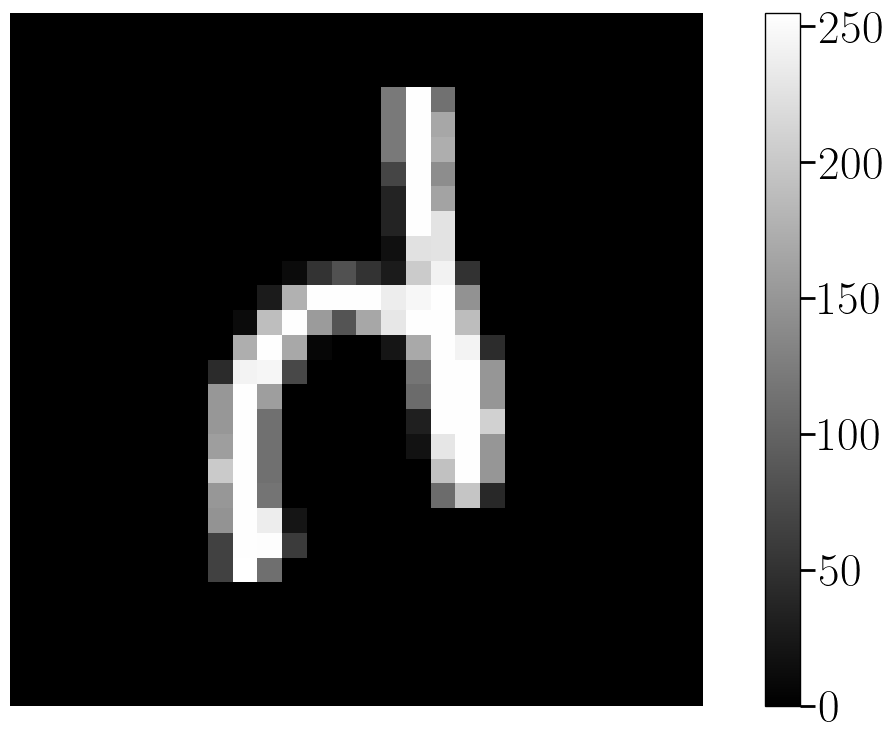

In [39]:
# indices = np.where(y == 8)[0]
X_digit = X.iloc[[5444]][:1] # Use .iloc to index rows correctly
patterns = X_digit.values  # Convert row to numpy array
# patterns = np.where(patterns > 127, 1, -1)
plt.imshow(patterns.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.colorbar()

In [4]:
lattice_sqr = Lattice2D(28)
lattice_sqr.compute_laplacian_spectrum_weigV()

In [5]:
basis = np.array([
    lattice_sqr.get_eigV_check(i, reshaped=False)
    for i in range(lattice_sqr.N // 2)
])

In [31]:
X.iloc[0][:1]

pixel1    0.0
Name: 0, dtype: float32

In [ ]:
spinovp_tmp = []
for i in tqdm(range(10)):
    X_digit = X.iloc[i] # Use .iloc to index rows correctly
    print(min(X_digit.values), max(X_digit.values))
    pattern = (X_digit.values).squeeze()  # Convert row to numpy array
    pattern /= max(pattern)
    print(min(pattern), max(pattern))
    spinovp_tmp.append(np.array([
        compute_recon(pattern, basis[:j+1])
        for j in range(lattice_sqr.N // 2)
    ]))

  0%|          | 0/10 [00:00<?, ?it/s]

0.0 9.274685e-13
0.0 1.0


 10%|█         | 1/10 [00:00<00:05,  1.54it/s]

0.0 9.274685e-13
0.0 1.0


 20%|██        | 2/10 [00:01<00:05,  1.54it/s]

0.0 9.274685e-13
0.0 1.0


 30%|███       | 3/10 [00:01<00:04,  1.55it/s]

0.0 9.274685e-13
0.0 1.0


 40%|████      | 4/10 [00:02<00:03,  1.53it/s]

0.0 9.274685e-13
0.0 1.0


 50%|█████     | 5/10 [00:03<00:03,  1.54it/s]

0.0 9.274685e-13
0.0 1.0


 60%|██████    | 6/10 [00:03<00:02,  1.54it/s]

0.0 9.274685e-13
0.0 1.0


 70%|███████   | 7/10 [00:04<00:01,  1.54it/s]

0.0 9.274685e-13
0.0 1.0


 80%|████████  | 8/10 [00:05<00:01,  1.54it/s]

0.0 9.274685e-13
0.0 1.0


 90%|█████████ | 9/10 [00:05<00:00,  1.54it/s]

0.0 6.0308636e-08
0.0 1.0


100%|██████████| 10/10 [00:06<00:00,  1.54it/s]


In [70]:
mse_img = []
for i in range(10):
    mse_img.append([])
    for j in range(lattice_sqr.N // 2):
        A = X.iloc[i].values
        B = spinovp_tmp[i][j]
        mse_img[i].append(((A - B)**2).mean())

(0.001, 1.0)

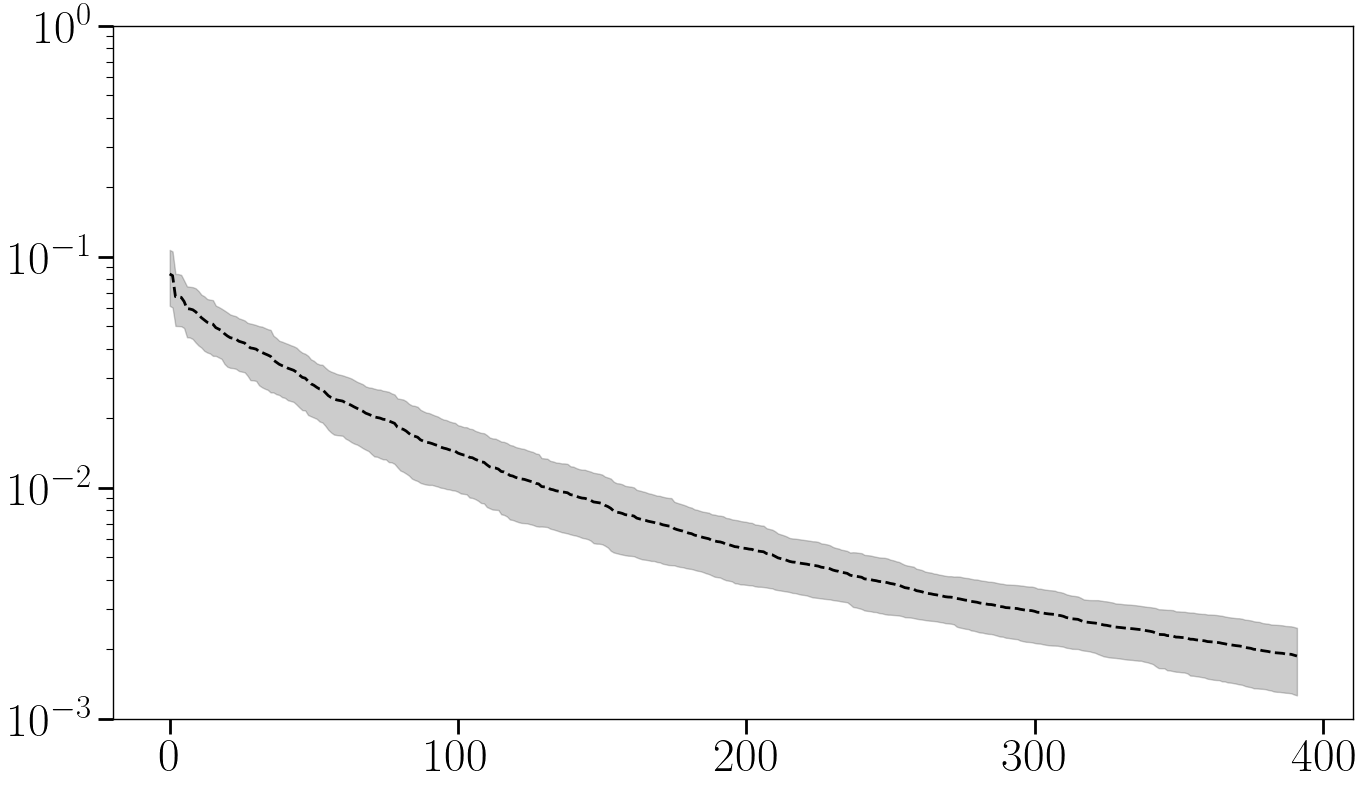

In [82]:
# for i in range(10):
#     plt.plot(mse_img[i])
plt.plot(np.mean(mse_img, axis=0), 'k--', lw=2)
plt.fill_between(
    np.arange(len(mse_img[0])),
    np.mean(mse_img, axis=0) - np.std(mse_img, axis=0),
    np.mean(mse_img, axis=0) + np.std(mse_img, axis=0),
    alpha=0.2,
    color='k'
)
plt.yscale('log')
plt.ylim(1e-3, 1e0)

In [66]:
A = X.iloc[0].values
B = spinovp_tmp[0][-1]
shuffled = np.random.permutation(A)
random_case = np.random.uniform(min(A), max(A), size=A.shape)

In [67]:
((A - B)**2).mean(), ((A - shuffled)**2).mean(), ((A - random_case)**2).mean()

(0.0025730504464180947, 0.19406556, 0.3151656345416129)

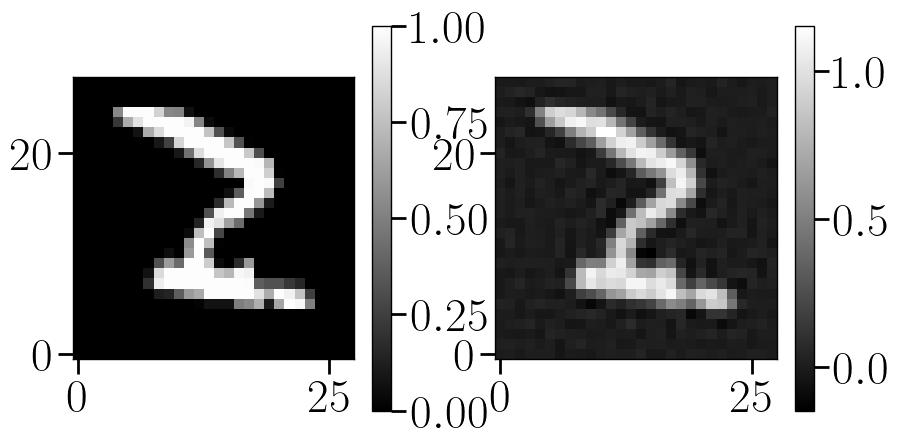

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
im0 = ax[0].imshow(A.reshape(28, 28), cmap='gray')
im1 = ax[1].imshow(B.reshape(28, 28), cmap='gray')
plt.colorbar(im0, ax=ax[0])
plt.colorbar(im1, ax=ax[1])

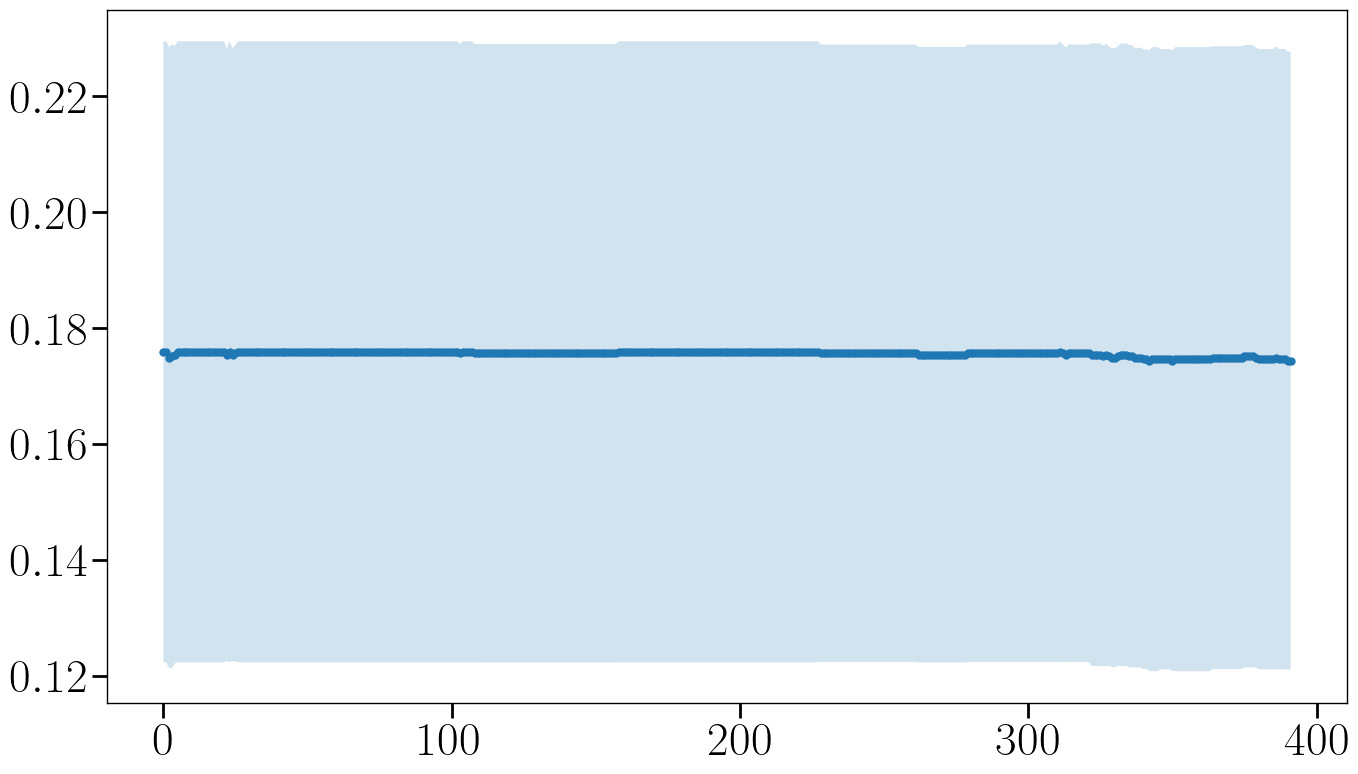

In [10]:
plt.plot(np.mean(spinovp_tmp, axis=0))
plt.fill_between(
    np.arange(lattice_sqr.N // 2),
    np.mean(spinovp_tmp, axis=0) - np.std(spinovp_tmp, axis=0),
    np.mean(spinovp_tmp, axis=0) + np.std(spinovp_tmp, axis=0),
    alpha=0.2
)